# Computational Finance: Assignment 2

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
from src.data_retrieval import get_amsterdam_temperature_data
from src.exploratory_analysis import (plot_time_series_with_rolling_stats,
                                      decompose_time_series,
                                      plot_decomposition)
from src.residual_analysis import (plot_residual_histogram,
                                   plot_qq,
                                   plot_acf_pacf,
                                   perform_adf_test,
                                   check_residual_autocorrelation)
from src.stochastic_model import (fit_arima_model,
                                  simulate_temperature,
                                  plot_simulations)
from src.model_fitting import (fit_deterministic_model,
                               plot_deterministic_fit,
                               fit_ar_model,
                               plot_ar_model_diagnostics,
                               simulate_temperature_with_ar,
                               plot_temperature_forecast)
from src.option_pricing import (simulate_temperature_paths,
                                calculate_cumulative_degree_days,
                                call_option_payoff,
                                put_option_payoff,
                                collar_option_payoff,
                                price_option,
                                plot_degree_day_distribution,
                                plot_option_payoff_distribution,
                                calculate_option_metrics,
                                plot_temperature_paths,
                                plot_cumulative_hdd_paths,
                                convergence_analysis)

In [2]:
# Part A: Data Retrieval
print("Retrieving temperature data for Amsterdam...")
daily_data = get_amsterdam_temperature_data(start_date="2020-08-10", end_date="2024-05-01")

print("Daily temperature data for Amsterdam:")
print(daily_data.head())

Retrieving temperature data for Amsterdam...
Daily temperature data for Amsterdam:
                           temperature_2m_mean
2020-08-10 00:00:00+00:00              6.90975
2020-08-11 00:00:00+00:00              6.90975
2020-08-12 00:00:00+00:00              6.90975
2020-08-13 00:00:00+00:00              6.90975
2020-08-14 00:00:00+00:00              6.90975


/Users/andrew/Desktop/Computational Science/CompFinance/lab2/src/data_retrieval.py:88: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_df = cleaned_df.fillna(method='ffill').fillna(method='bfill')



Performing exploratory data analysis...


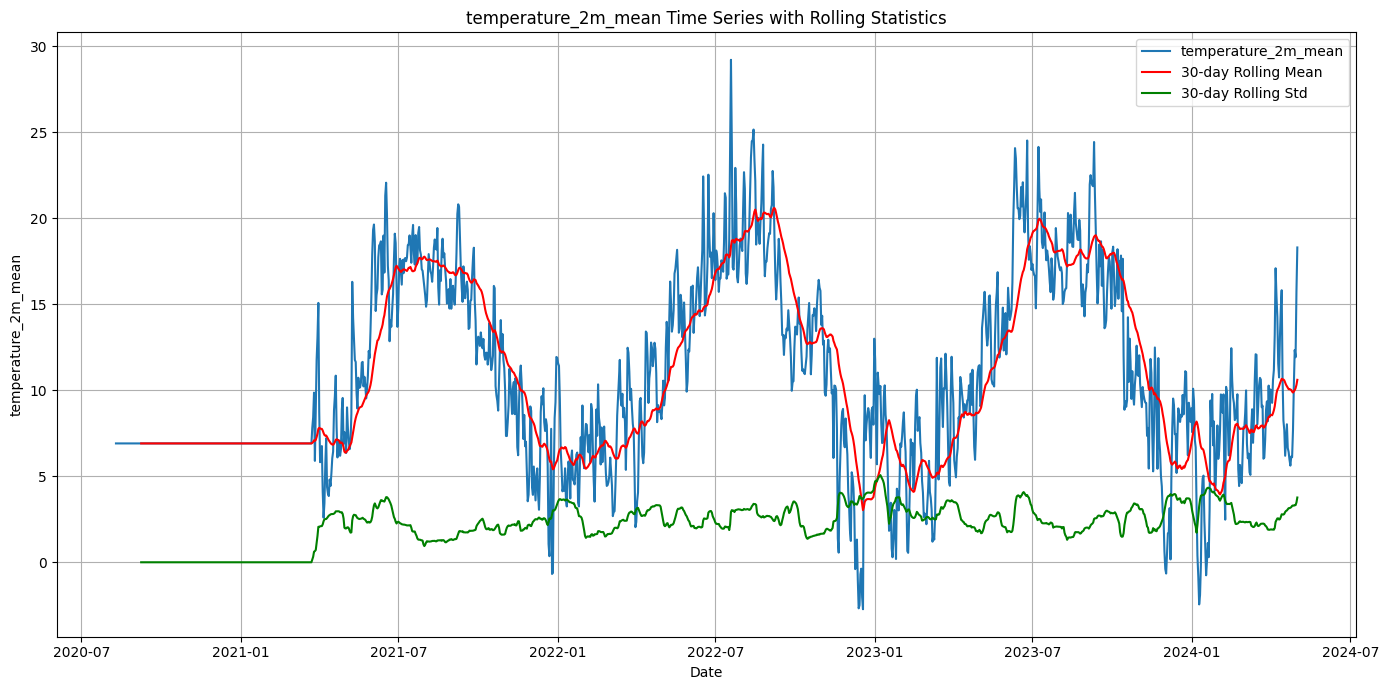

In [3]:
# Part B: Exploratory Data Analysis
print("\nPerforming exploratory data analysis...")
plot_time_series_with_rolling_stats(daily_data, 'temperature_2m_mean', window=30)

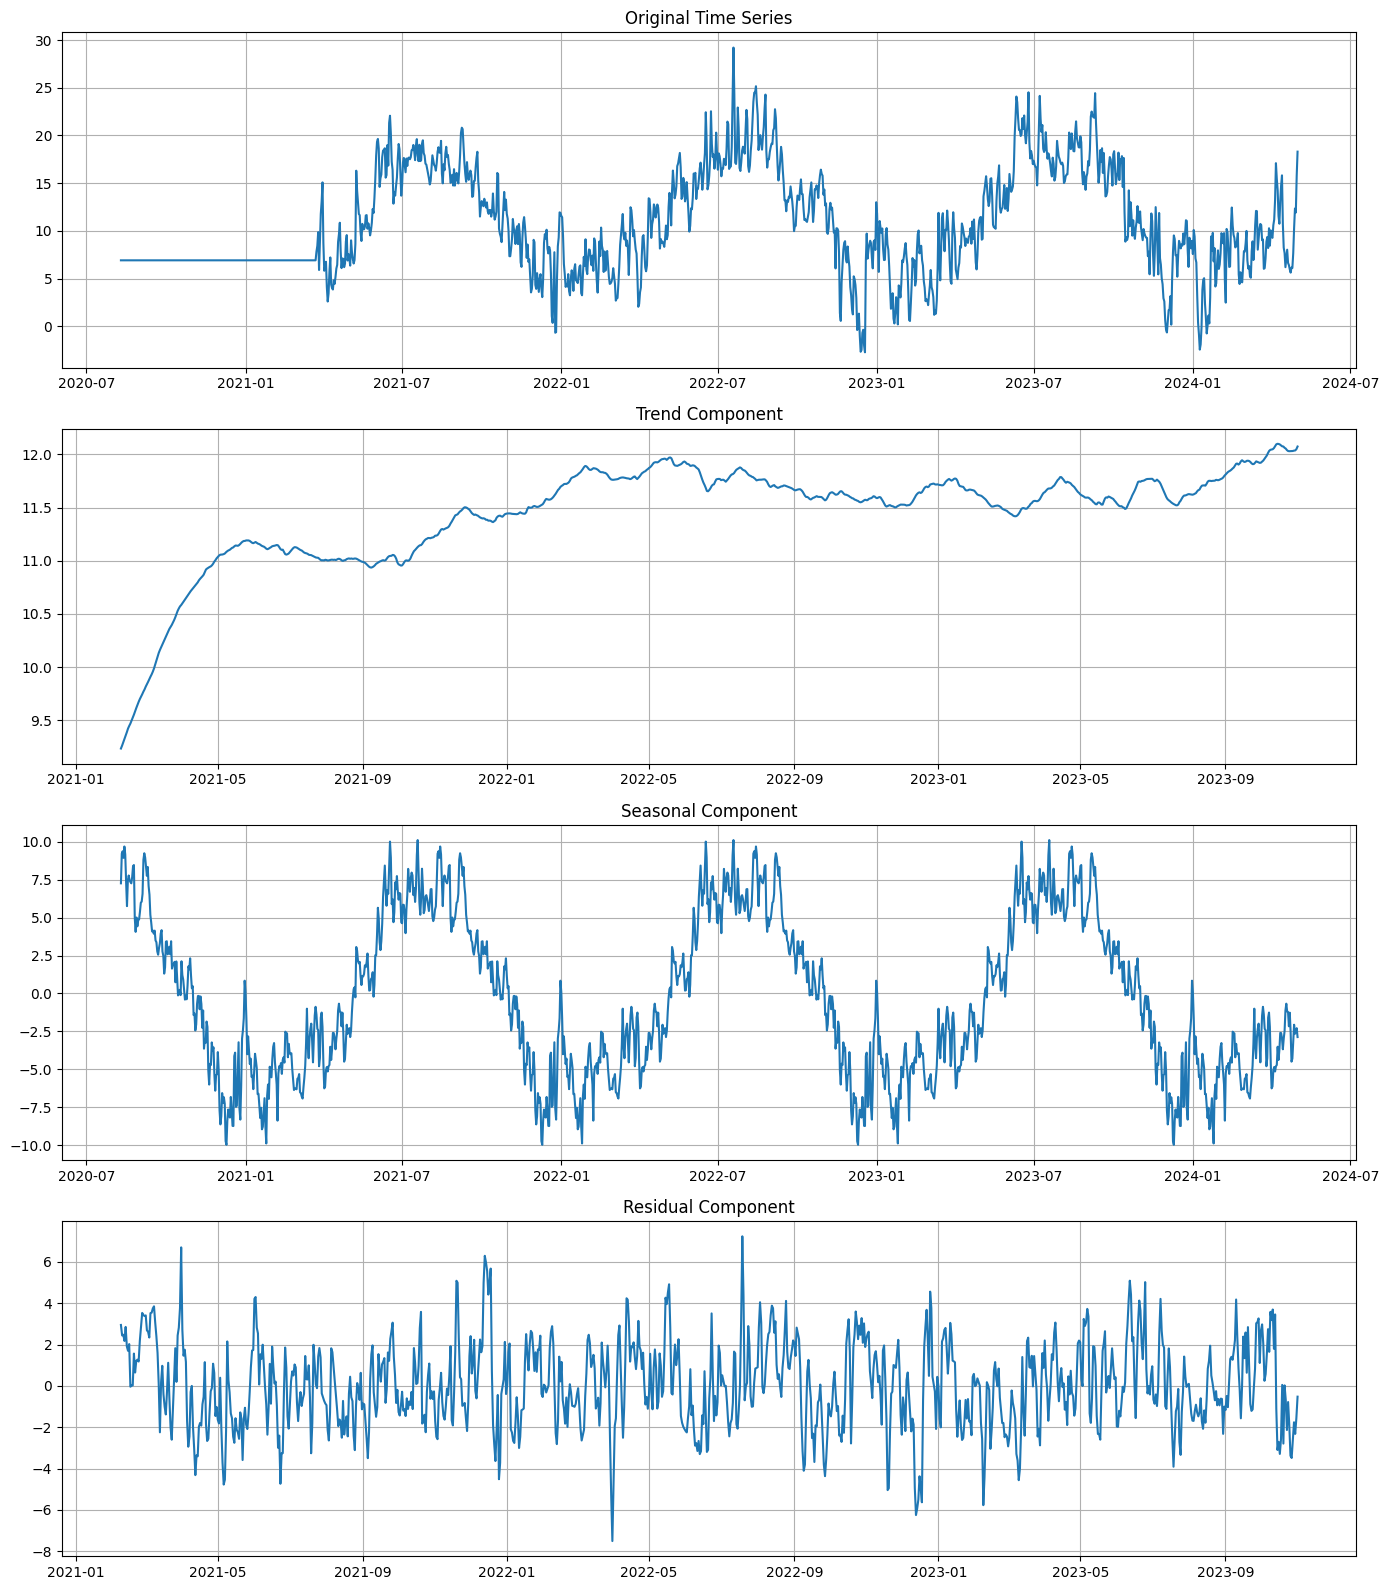


Analyzing residuals...


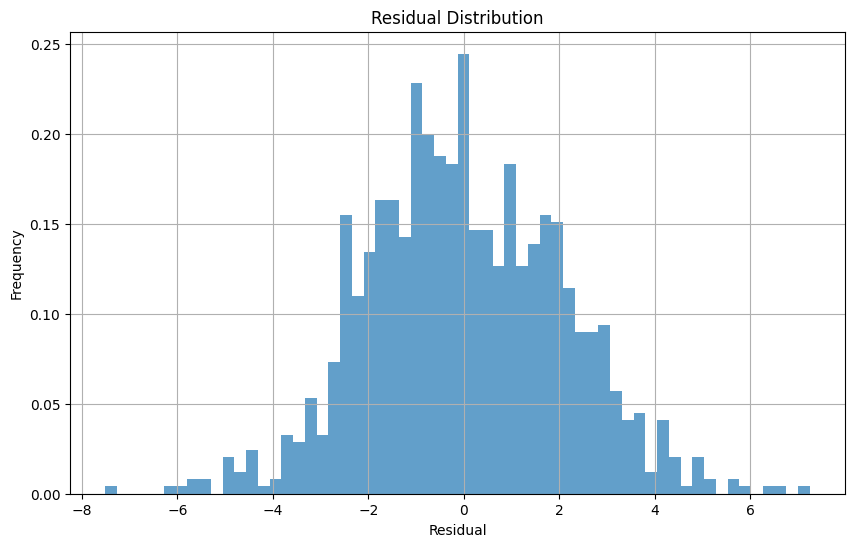

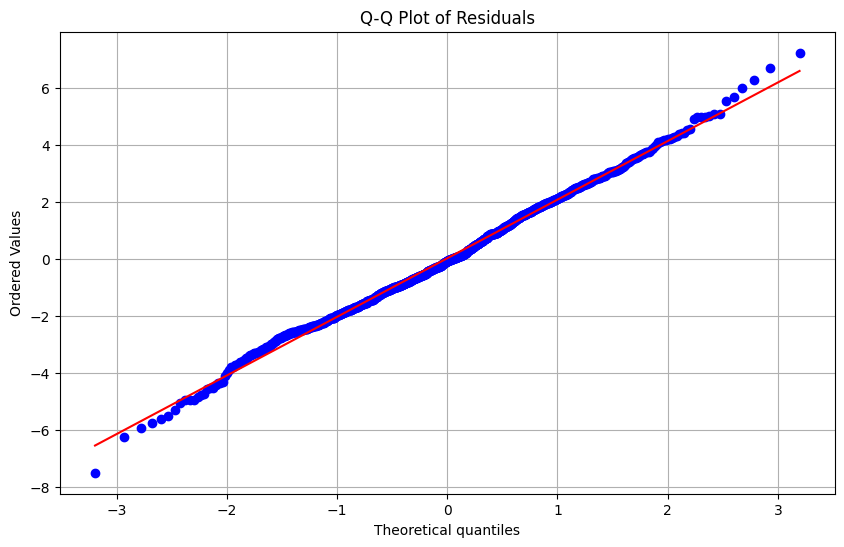

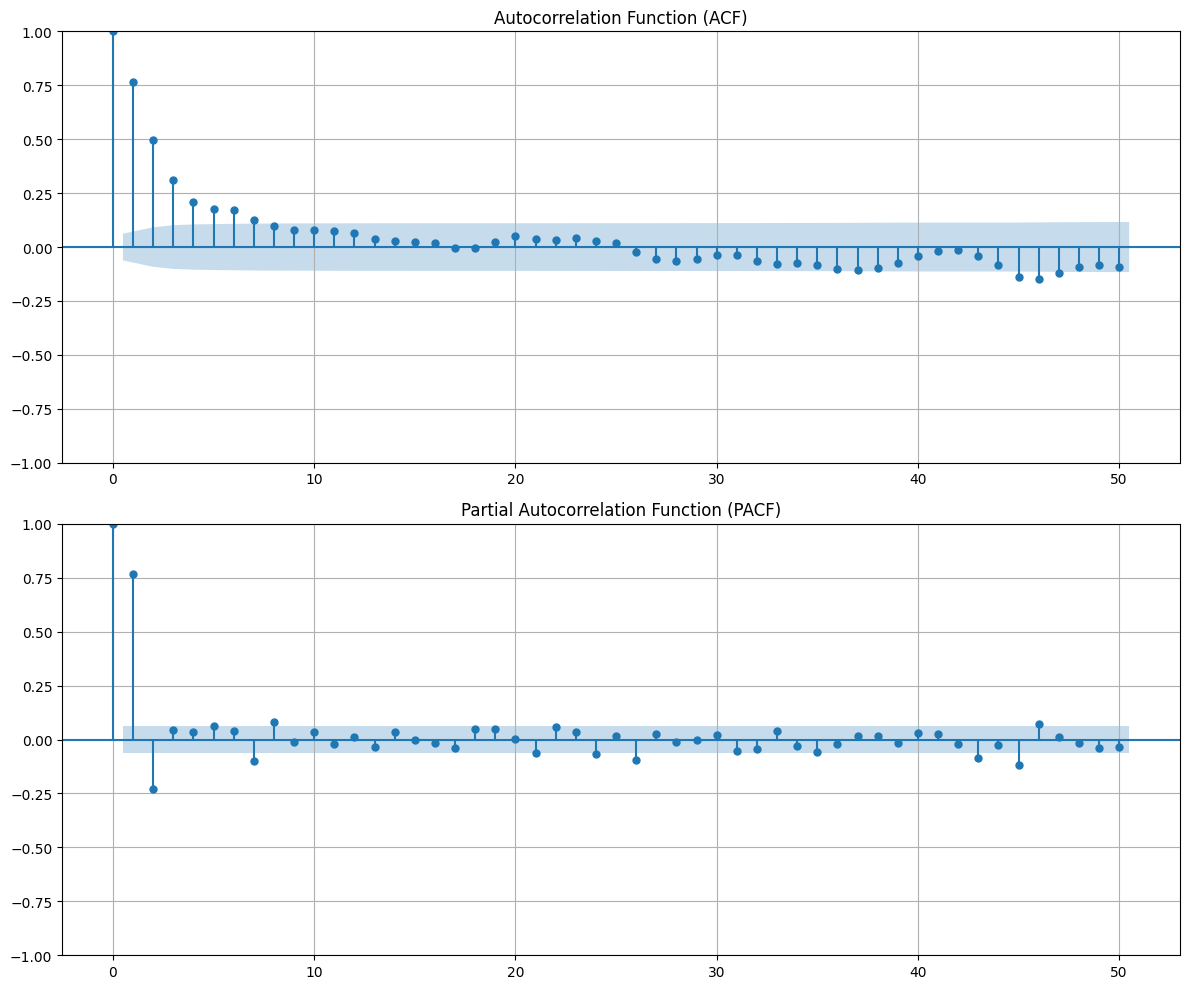

In [4]:
decompose_result = decompose_time_series(daily_data, 'temperature_2m_mean', period=365)
trend, seasonal, residual = plot_decomposition(decompose_result, daily_data['temperature_2m_mean'])
    
# Residual Analysis
print("\nAnalyzing residuals...")
plot_residual_histogram(residual)
plot_qq(residual)
plot_acf_pacf(residual, lags=50)

In [5]:
# Stationarity Test
print("\nTesting for stationarity...")
adf_result = perform_adf_test(residual)


Testing for stationarity...
ADF Statistic: -8.226346
p-value: 0.000000
Critical Values:
   1%: -3.436979275944879
   5%: -2.8644668170148058
   10%: -2.5683283824496153
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary


Ljung-Box Test for Autocorrelation:
        lb_stat      lb_pvalue
10  1072.450905  4.577930e-224
20  1088.397686  5.330032e-218
30  1106.312816  1.729018e-213

Fitting ARIMA model to residuals...
                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  997
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1661.446
Date:                Sat, 10 May 2025   AIC                           3332.892
Time:                        15:02:37   BIC                           3357.416
Sample:                    02-08-2021   HQIC                          3342.214
                         - 11-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        

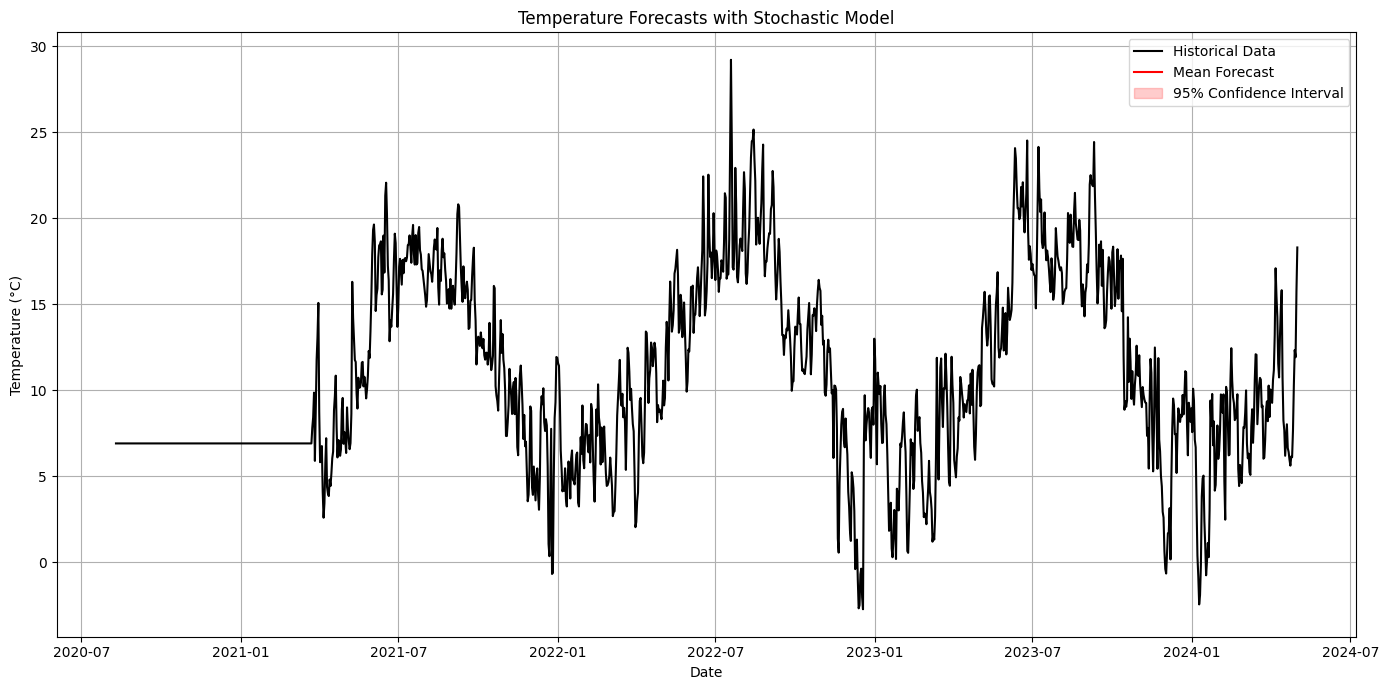

In [6]:
# Autocorrelation Check
lb_result = check_residual_autocorrelation(residual, lags=[10, 20, 30])

# Fit ARIMA model to residuals
print("\nFitting ARIMA model to residuals...")
# Choose order based on ACF/PACF plots
arima_model = fit_arima_model(residual, order=(2, 0, 1))

# Simulate future temperatures
print("\nSimulating future temperatures...")
simulations = simulate_temperature(trend, seasonal, arima_model, n_steps=365, n_simulations=10)

# Plot simulations
plot_simulations(daily_data, simulations)



Part C: Fitting deterministic model and AR process...

Fitting deterministic seasonal model...
Estimated parameters:
a (intercept): 9.2616
b (trend): 0.002629
alpha (amplitude): 6.1234
theta (phase): 1.8848


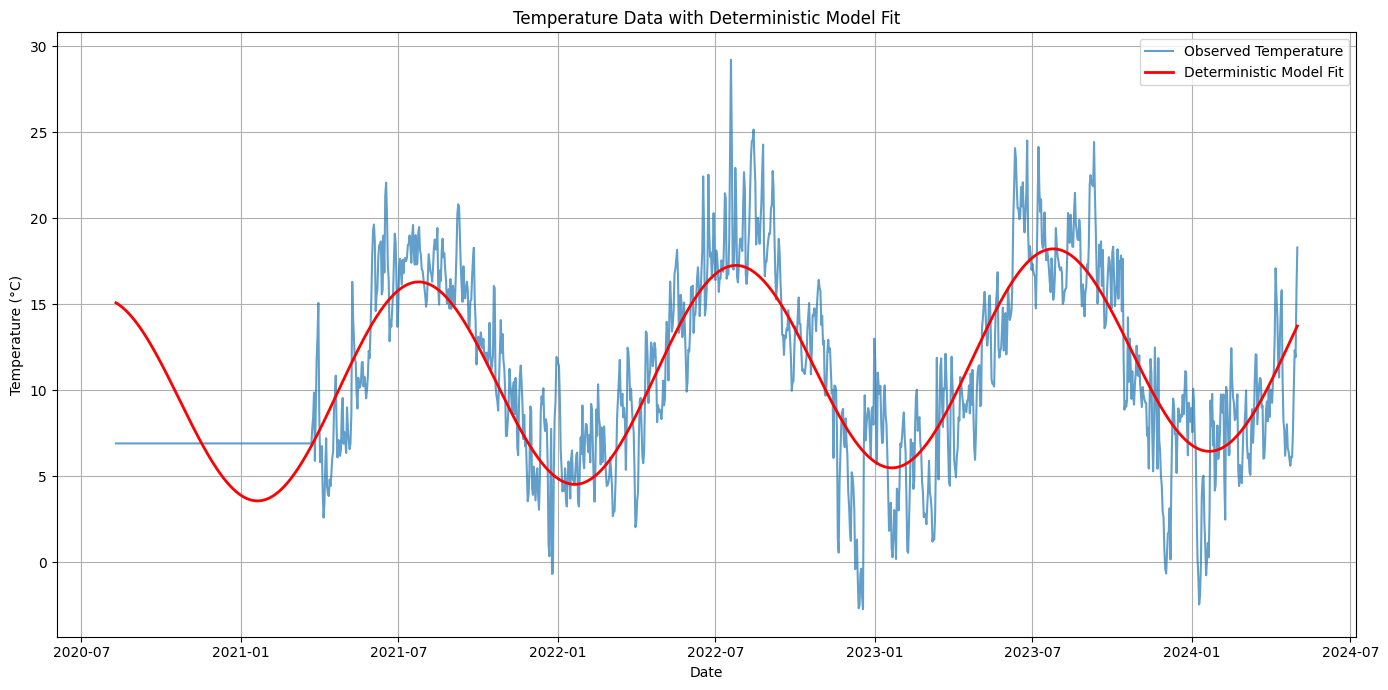

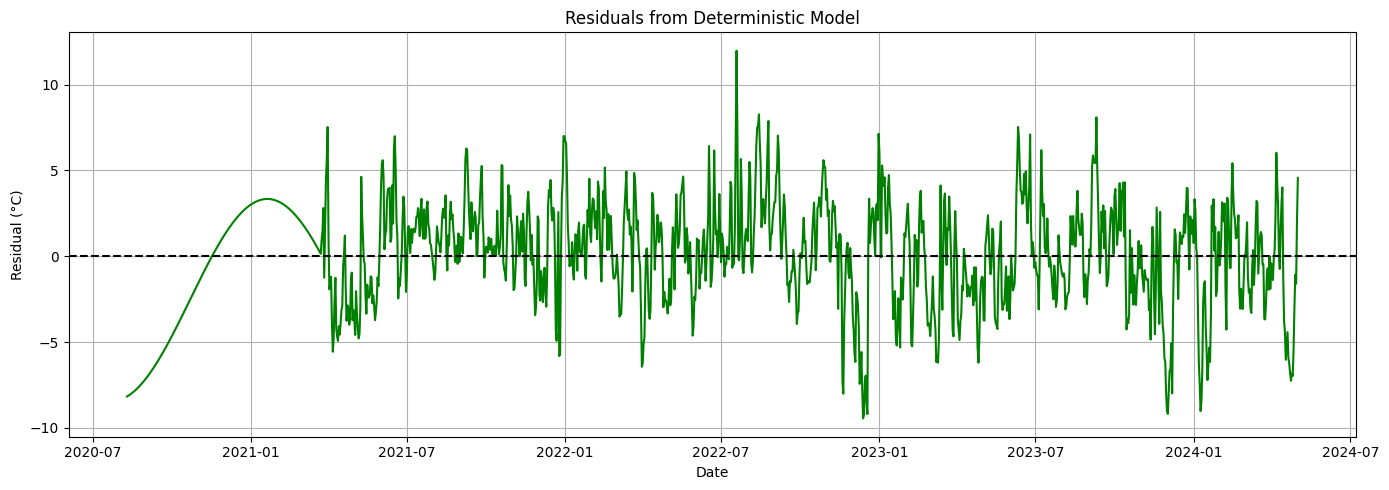


Fitting AR model to residuals...
Best AR order (p) based on AIC: 10
AIC value: 5138.8136

Autoregressive model summary:
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1361
Model:                    AutoReg(10)   Log Likelihood               -2557.407
Method:               Conditional MLE   S.D. of innovations              1.606
Date:                Sat, 10 May 2025   AIC                           5138.814
Time:                        15:02:38   BIC                           5201.317
Sample:                            10   HQIC                          5162.220
                                 1361                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0162      0.044      0.370      0.711      -0.069       0.102
y.L1      

/Users/andrew/Desktop/Computational Science/CompFinance/lab2/src/model_fitting.py:183: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ar_coef = best_model.params[1]  # First AR coefficient


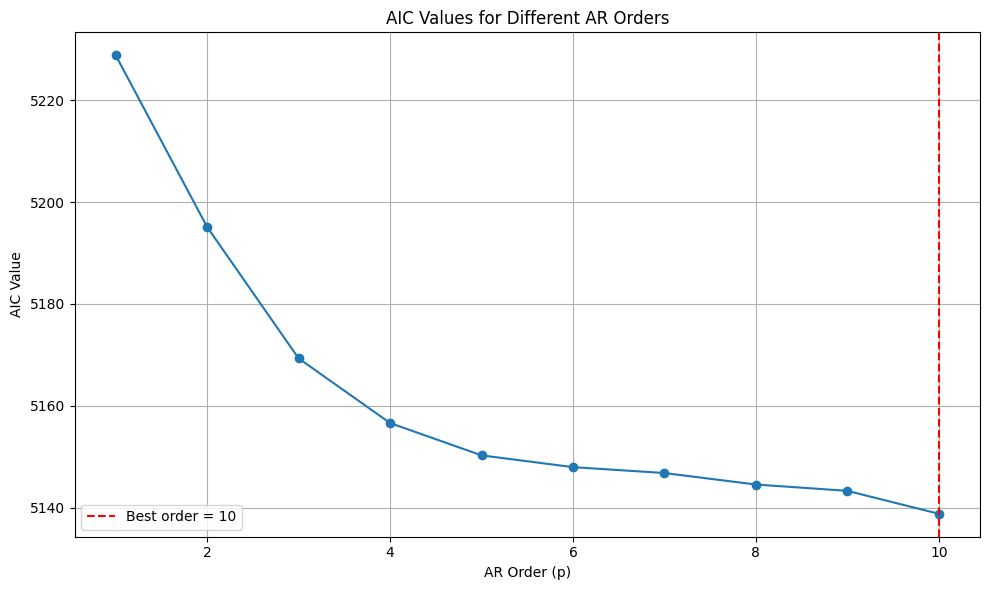

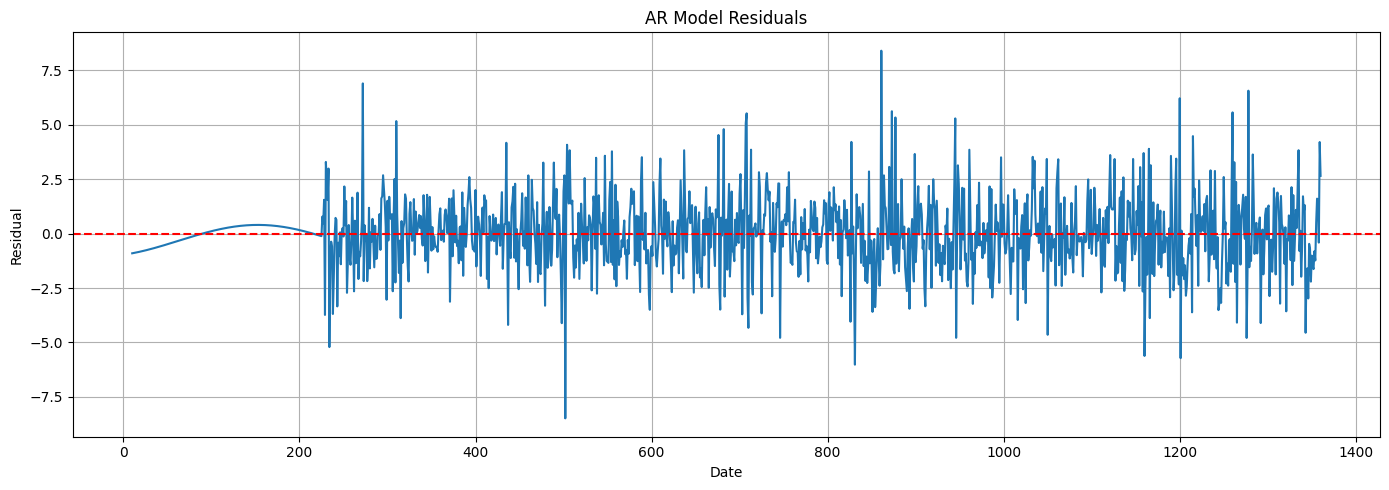

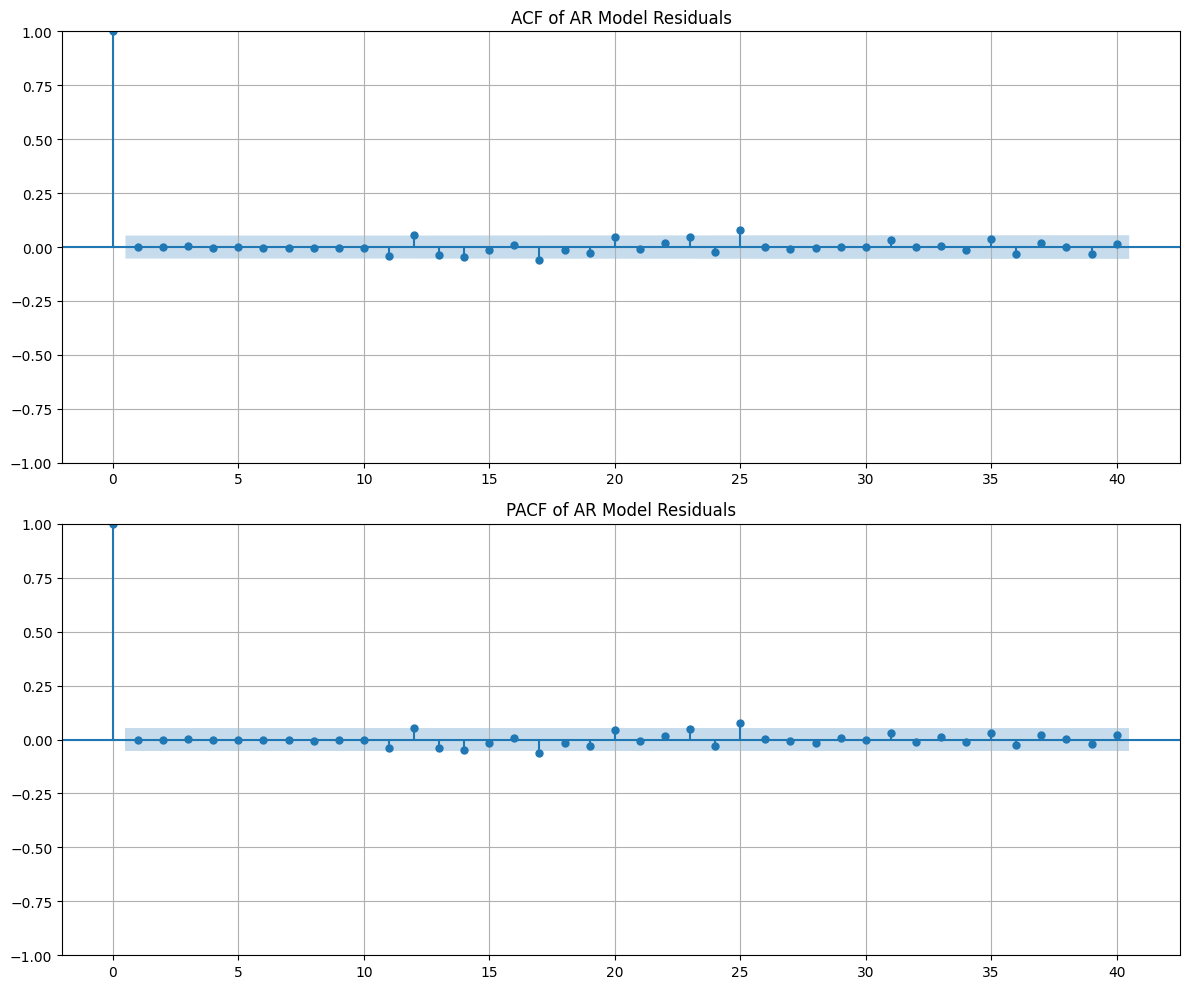

<Figure size 1000x600 with 0 Axes>

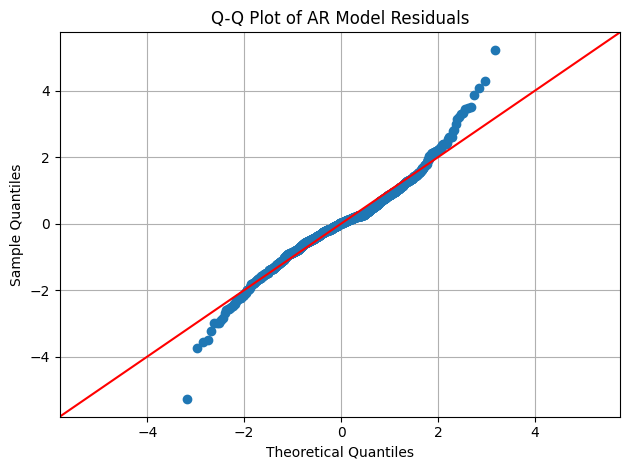

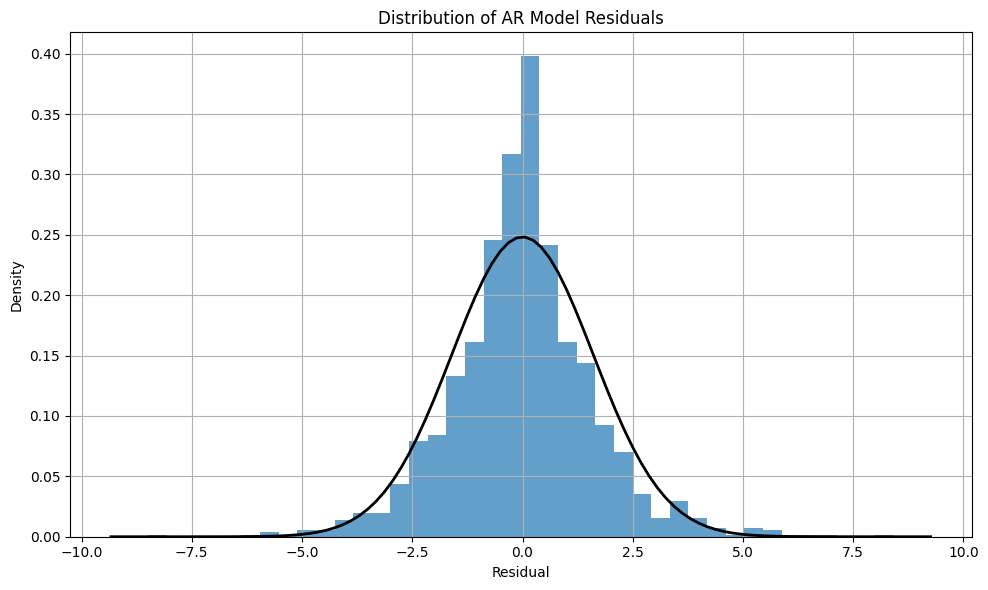


Simulating future temperatures with deterministic-AR model...


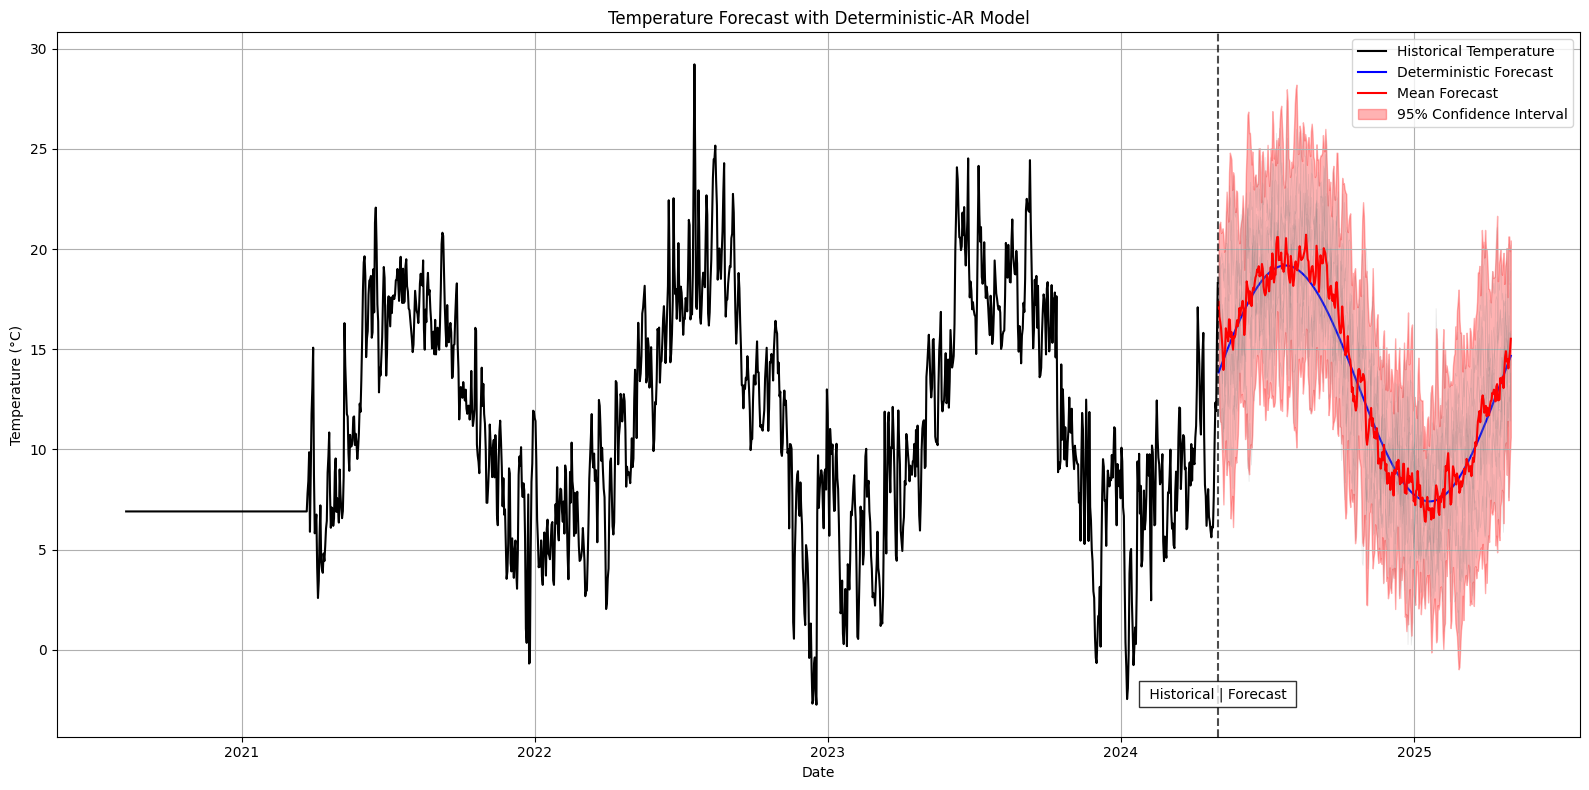

In [7]:
# Part C: Fitting the Model under P
print("\n\nPart C: Fitting deterministic model and AR process...")

# Task 1: Deterministic Model Fitting
print("\nFitting deterministic seasonal model...")
det_model_result = fit_deterministic_model(daily_data, column='temperature_2m_mean')
plot_deterministic_fit(daily_data, det_model_result, column='temperature_2m_mean')

# Task 2: Autoregressive Modeling of Residuals
print("\nFitting AR model to residuals...")
ar_model_result = fit_ar_model(det_model_result['residuals'], max_order=10)
plot_ar_model_diagnostics(ar_model_result['model'])

# Simulate future temperatures
print("\nSimulating future temperatures with deterministic-AR model...")
simulations = simulate_temperature_with_ar(
    daily_data, 
    det_model_result, 
    ar_model_result, 
    n_steps=365, 
    n_simulations=10, 
    column='temperature_2m_mean'
)

# Plot forecast
plot_temperature_forecast(daily_data, simulations, column='temperature_2m_mean')



Part D: Pricing HDD temperature options using Monte Carlo simulation...

Simulating temperature paths...
Simulation period: 2024-12-01 00:00:00 to 2025-02-28 00:00:00 (90 days)
Model parameters: a=9.261561506609198, b=0.0026291133154503713, alpha=6.123435828554064, theta=1.8848281066823755
Deterministic component - Min: 10.96°C, Max: 15.42°C, Mean: 14.05°C


Simulating temperature paths: 100%|██████████| 1000/1000 [00:01<00:00, 632.94it/s]


Proportion of days with zero HDDs: 14.44%


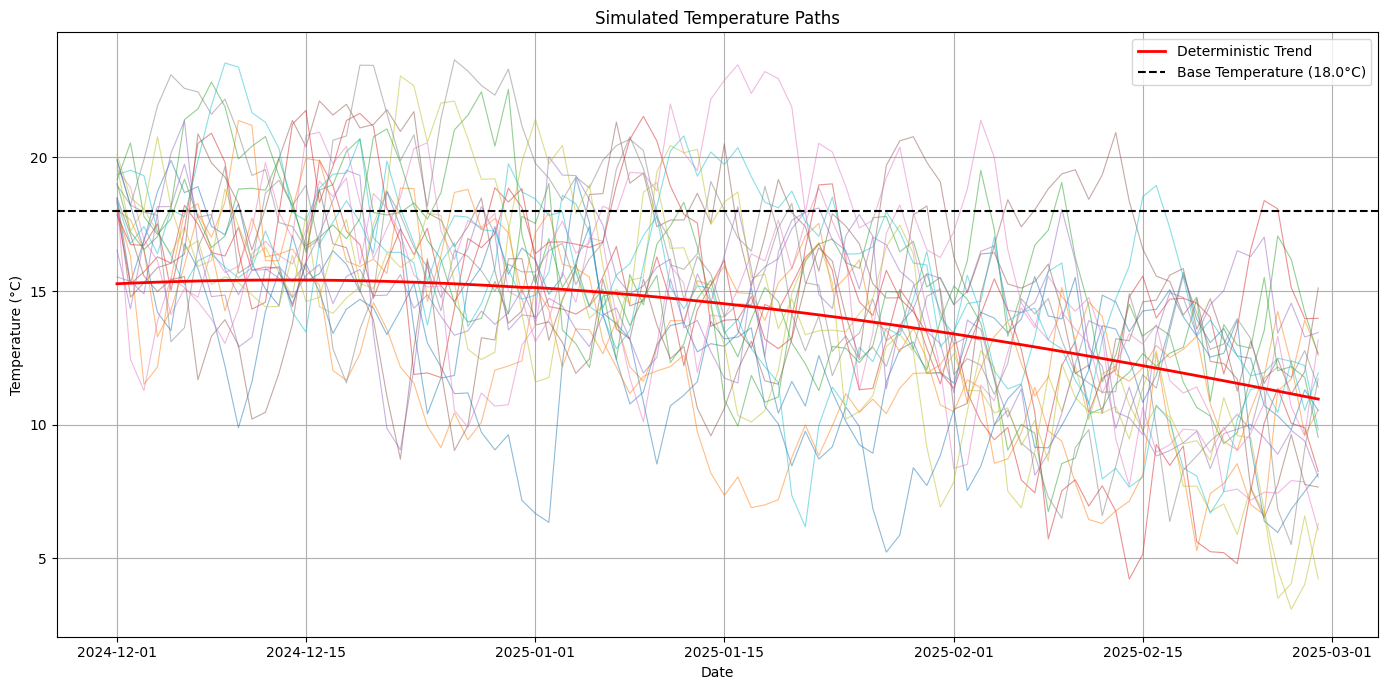

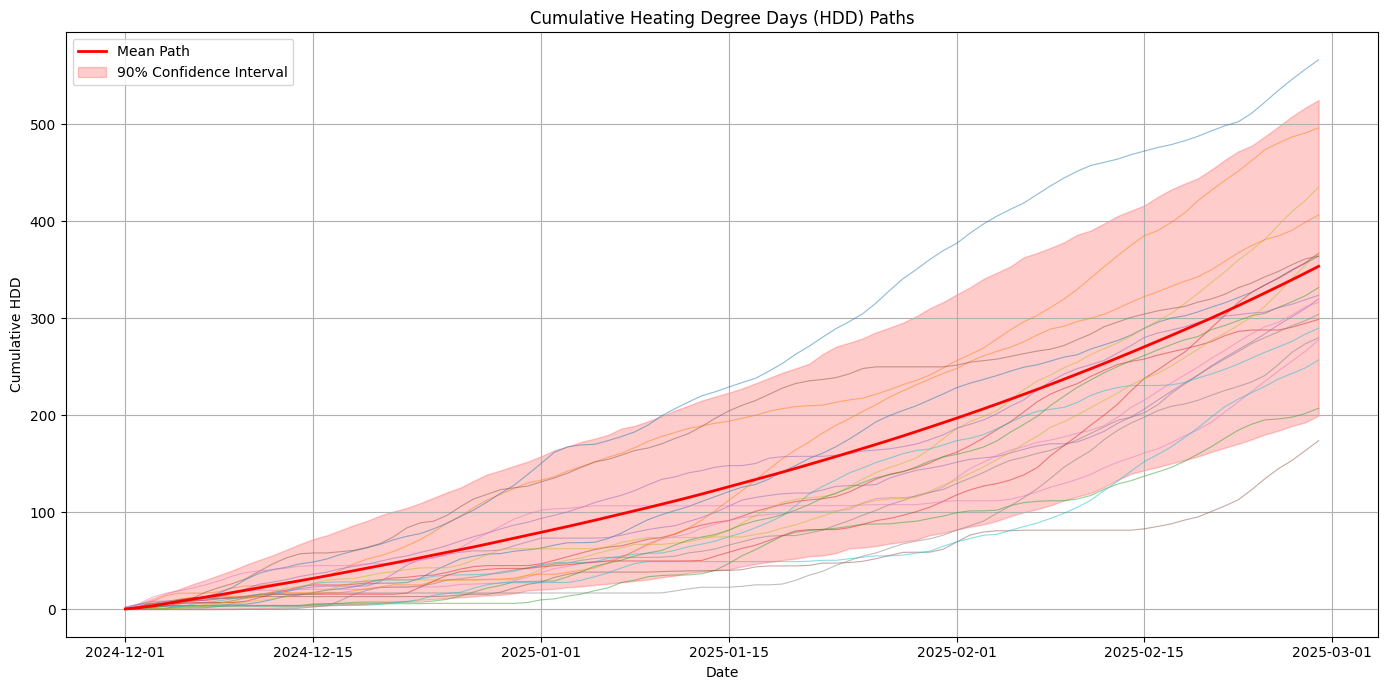

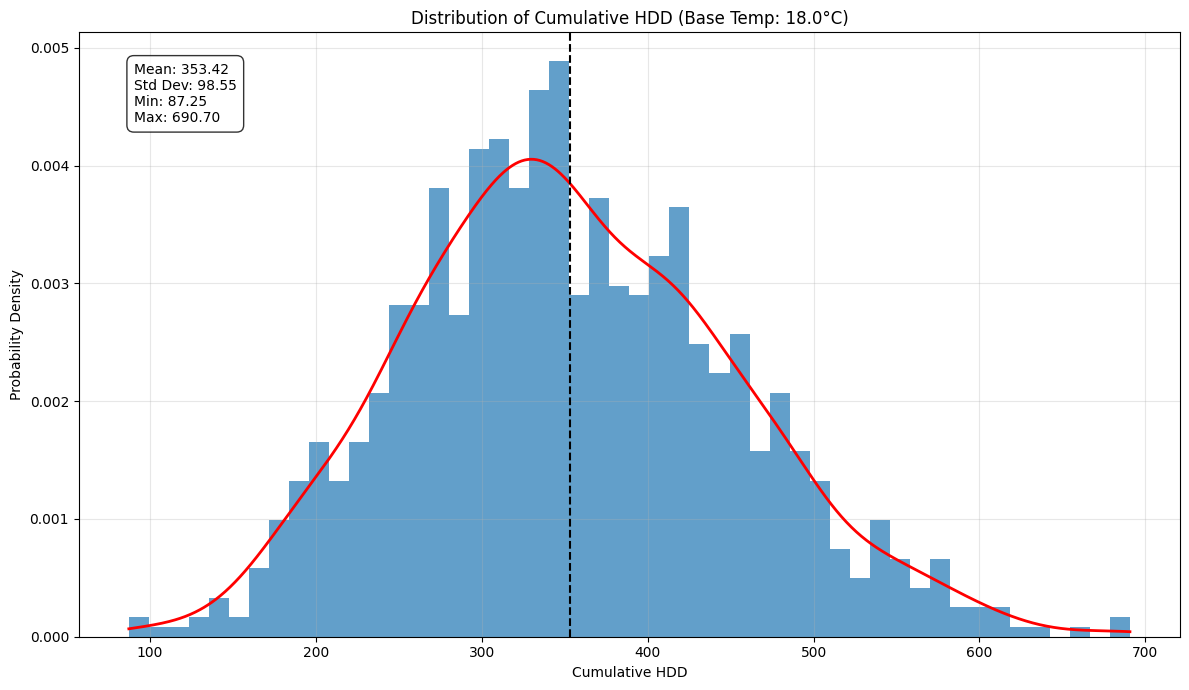


Calculating option payoffs and prices...

HDD Call Option (Strike = 353, Tick Size = $100):
Price: $3921.12 ± $190.32
Mean Payoff: $3969.18
Max Payoff: $33770.05
95% VaR: $-0.00
Probability of Zero Payoff: 53.80%


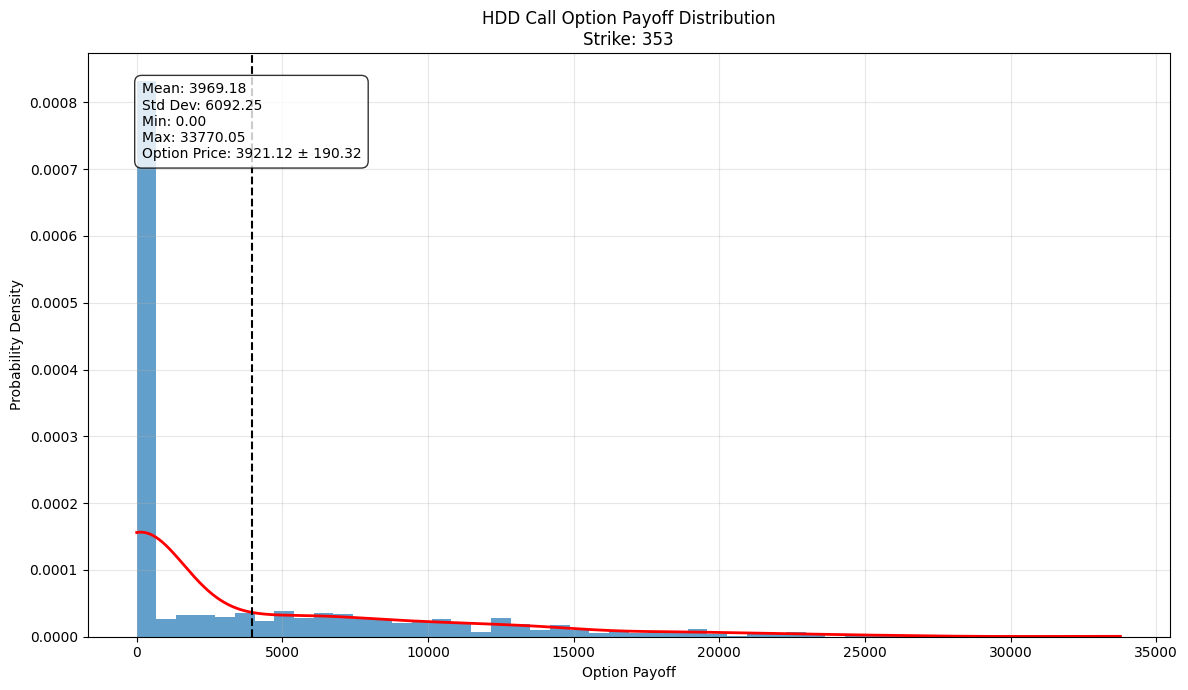


HDD Put Option (Strike = 353, Tick Size = $100):
Price: $3879.51 ± $167.73
Mean Payoff: $3927.06
Max Payoff: $26574.69
95% VaR: $-0.00
Probability of Zero Payoff: 46.20%


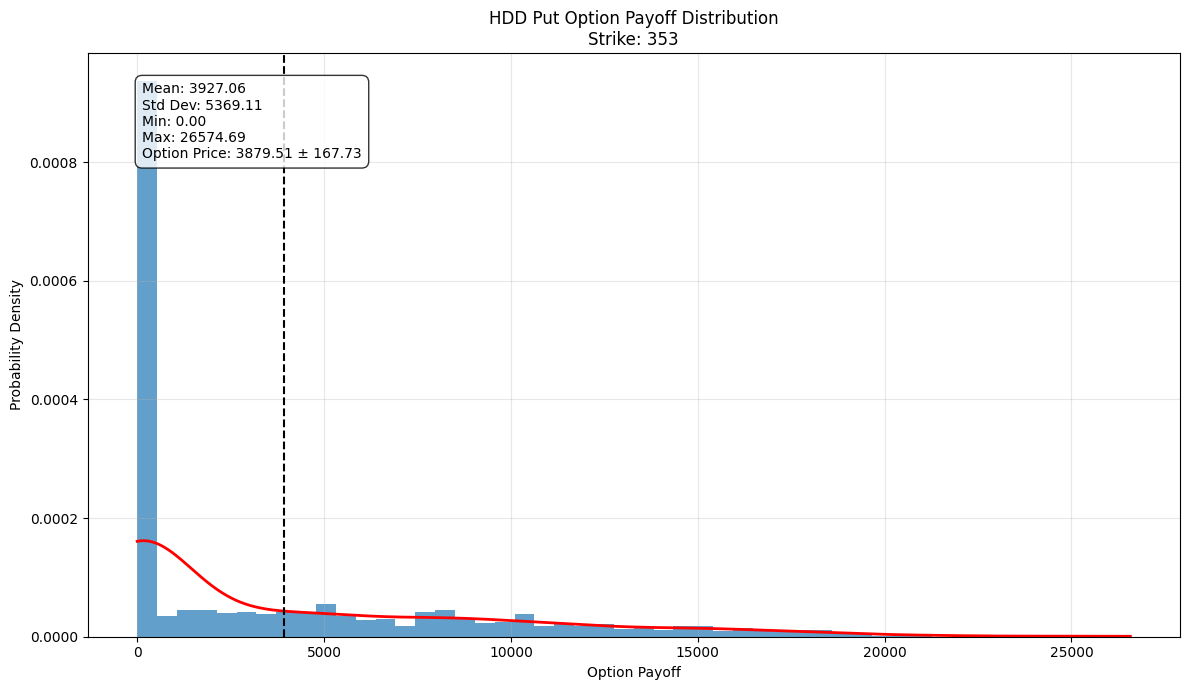


HDD Collar Option (Call Strike = 304, Put Strike = 403, Tick Size = $100):
Price: $-222.68 ± $431.28
Mean Payoff: $-225.41
Min Payoff: $-31574.69
Max Payoff: $38670.05
95% VaR: $20336.17


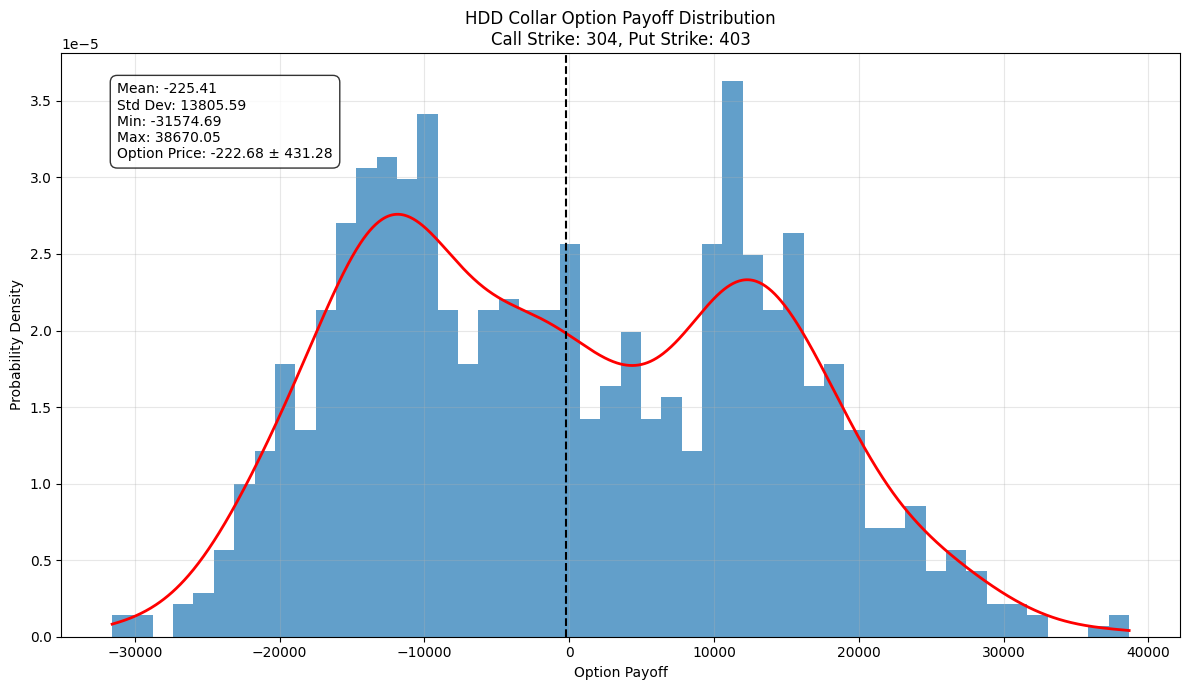


Analyzing effect of strike price on option values...


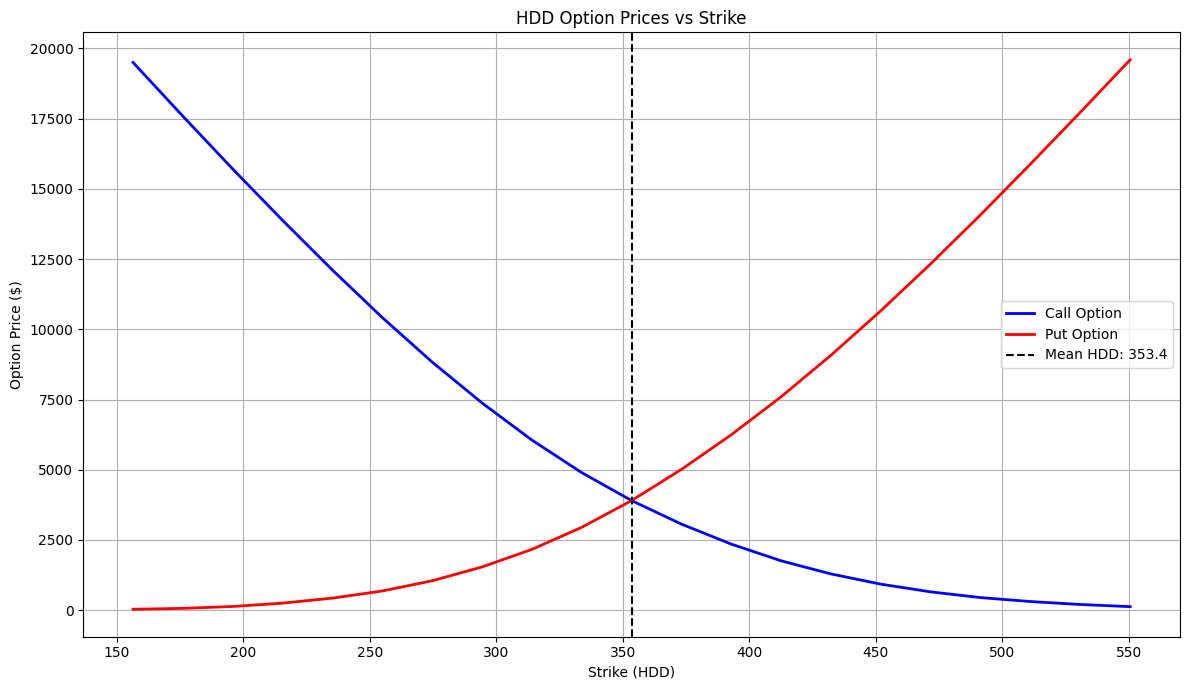


Analyzing sensitivity to base temperature...

=== HDD Option Pricing Summary ===
Contract Period: 2024-12-01 to 2025-02-28
Base Temperature: 18.0°C (CME standard)
Risk-Free Rate: 5.0%
Tick Size (Notional Value): $100 per degree day

Expected Cumulative HDD: 353.42 ± 98.55
ATM Strike: 353

Option Prices:
- ATM Call: $3921.12 ± 190.32
- ATM Put: $3879.51 ± 167.73
- Collar: $-222.68 ± 431.28


In [11]:
# Part D: Pricing Temperature Options
print("\n\nPart D: Pricing HDD temperature options using Monte Carlo simulation...")

# Set simulation parameters for winter period
start_date = dt.datetime(2024, 12, 1)   # Start date for option period (winter)
end_date = dt.datetime(2025, 2, 28)     # End date for option period (winter)
risk_free_rate = 0.05              # Annual risk-free rate
base_temp = 18.0                        # Base temperature for HDD (CME standard)

# Try the simplified approach that still uses the fitted model
print("\nSimulating temperature paths...")
simulation_results = simulate_temperature_paths(
    det_model_result,
    ar_model_result,
    start_date,
    end_date,
    n_paths=1000,
    base_temp=base_temp
)

# Plot some of the simulated paths
plot_temperature_paths(simulation_results, n_paths_to_show=20)

# Plot cumulative heating degree day paths
plot_cumulative_hdd_paths(simulation_results, n_paths_to_show=20)

# Calculate cumulative heating degree days
cum_hdd = calculate_cumulative_degree_days(simulation_results)

# Plot distribution of cumulative heating degree days
plot_degree_day_distribution(cum_hdd, base_temp)

# Task 2: Calculate Option Payoffs and Prices
print("\nCalculating option payoffs and prices...")

# Time to maturity in years
time_to_maturity = (end_date - start_date).days / 365.25

# Set option parameters
mean_hdd = np.mean(cum_hdd)
std_hdd = np.std(cum_hdd)

# Strike prices at different levels relative to expected HDD
atm_strike = round(mean_hdd)                     # At-the-money
otm_call_strike = round(mean_hdd - 0.5 * std_hdd)     # Out-of-the-money call
otm_put_strike = round(mean_hdd + 0.5 * std_hdd)      # Out-of-the-money put

# Tick size (notional value) as specified in equation (24)
tick_size = 100  # $100 per degree day


# Price Call Option with the final model
call_payoffs = call_option_payoff(cum_hdd, atm_strike, tick_size)
call_price, call_std_error = price_option(call_payoffs, risk_free_rate, time_to_maturity)

print(f"\nHDD Call Option (Strike = {atm_strike}, Tick Size = ${tick_size}):")
print(f"Price: ${call_price:.2f} ± ${call_std_error:.2f}")
call_metrics = calculate_option_metrics(call_payoffs)
print(f"Mean Payoff: ${call_metrics['mean']:.2f}")
print(f"Max Payoff: ${call_metrics['max']:.2f}")
print(f"95% VaR: ${-call_metrics['VaR_95']:.2f}")
print(f"Probability of Zero Payoff: {call_metrics['zero_probability']:.2%}")

# Only create plot if there's at least some variation in payoffs
plot_option_payoff_distribution(call_payoffs, 'Call', atm_strike, call_price, call_std_error)

# Price Put Option
put_payoffs = put_option_payoff(cum_hdd, atm_strike, tick_size)
put_price, put_std_error = price_option(put_payoffs, risk_free_rate, time_to_maturity)

print(f"\nHDD Put Option (Strike = {atm_strike}, Tick Size = ${tick_size}):")
print(f"Price: ${put_price:.2f} ± ${put_std_error:.2f}")
put_metrics = calculate_option_metrics(put_payoffs)
print(f"Mean Payoff: ${put_metrics['mean']:.2f}")
print(f"Max Payoff: ${put_metrics['max']:.2f}")
print(f"95% VaR: ${-put_metrics['VaR_95']:.2f}")
print(f"Probability of Zero Payoff: {put_metrics['zero_probability']:.2%}")

# Only create plot if there's at least some variation in payoffs
plot_option_payoff_distribution(put_payoffs, 'Put', atm_strike, put_price, put_std_error)

# Price Collar Option
collar_payoffs = collar_option_payoff(
    cum_hdd, 
    otm_call_strike, 
    otm_put_strike, 
    call_tick=tick_size, 
    put_tick=tick_size
)
collar_price, collar_std_error = price_option(collar_payoffs, risk_free_rate, time_to_maturity)

print(f"\nHDD Collar Option (Call Strike = {otm_call_strike}, Put Strike = {otm_put_strike}, Tick Size = ${tick_size}):")
print(f"Price: ${collar_price:.2f} ± ${collar_std_error:.2f}")
collar_metrics = calculate_option_metrics(collar_payoffs)
print(f"Mean Payoff: ${collar_metrics['mean']:.2f}")
print(f"Min Payoff: ${collar_metrics['min']:.2f}")
print(f"Max Payoff: ${collar_metrics['max']:.2f}")
print(f"95% VaR: ${-collar_metrics['VaR_95']:.2f}")

# Only create plot if there's at least some variation in payoffs
plot_option_payoff_distribution(collar_payoffs, 'Collar', (otm_call_strike, otm_put_strike), collar_price, collar_std_error)

# Analysis of effect of strike price on option values
print("\nAnalyzing effect of strike price on option values...")

# Range of strikes around the mean
strike_range = np.linspace(mean_hdd - 2*std_hdd, mean_hdd + 2*std_hdd, 21)
call_prices = []
put_prices = []

for strike in strike_range:
    # Calculate call option price
    call_pay = call_option_payoff(cum_hdd, strike, tick_size)
    call_p, _ = price_option(call_pay, risk_free_rate, time_to_maturity)
    call_prices.append(call_p)
    
    # Calculate put option price
    put_pay = put_option_payoff(cum_hdd, strike, tick_size)
    put_p, _ = price_option(put_pay, risk_free_rate, time_to_maturity)
    put_prices.append(put_p)

# Plot option prices vs strike
plt.figure(figsize=(12, 7))
plt.plot(strike_range, call_prices, 'b-', linewidth=2, label='Call Option')
plt.plot(strike_range, put_prices, 'r-', linewidth=2, label='Put Option')
plt.axvline(x=mean_hdd, color='k', linestyle='--', label=f'Mean HDD: {mean_hdd:.1f}')

plt.title('HDD Option Prices vs Strike')
plt.xlabel('Strike (HDD)')
plt.ylabel('Option Price ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Sensitivity to base temperature
print("\nAnalyzing sensitivity to base temperature...")

# Range of base temperatures around the standard 18°C
base_temp_range = np.linspace(16, 20, 9)
base_results = []

# Present final summary of HDD option pricing results
print("\n=== HDD Option Pricing Summary ===")
print(f"Contract Period: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
print(f"Base Temperature: {base_temp}°C (CME standard)")
print(f"Risk-Free Rate: {risk_free_rate:.1%}")
print(f"Tick Size (Notional Value): ${tick_size} per degree day")
print(f"\nExpected Cumulative HDD: {mean_hdd:.2f} ± {std_hdd:.2f}")
print(f"ATM Strike: {atm_strike}")
print(f"\nOption Prices:")
print(f"- ATM Call: ${call_price:.2f} ± {call_std_error:.2f}")
print(f"- ATM Put: ${put_price:.2f} ± {put_std_error:.2f}")
print(f"- Collar: ${collar_price:.2f} ± {collar_std_error:.2f}")